In [116]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import seaborn as sns

from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

In [117]:
def generate_data(N, dim=32, attention_col=1):
    x = np.random.standard_normal(size=(N, dim))
    y = np.random.randint(low=0, high=3, size=(N, 1))
    for ix in range(attention_col):
        x[:, ix] = y[:, 0]
    return x, y

In [118]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(Net, self).__init__()
        self.attention = nn.Linear(ndim, ndim)
        self.out = nn.Linear(ndim, 1)
    
    def attn(self, x):
        p = F.softmax(self.attention(x))
        return p
        
    def forward(self, x):
        x = x*self.attn(x)
        x = self.out(x)
        return x

In [119]:
model = Net(ndim=64)

In [120]:
X, y = generate_data(1000, dim=64, attention_col=5)
print X
print y

[[ 2.          2.          2.         ... -0.13192406  1.25032545
   0.08192498]
 [ 0.          0.          0.         ... -1.21027383  0.75541262
  -0.19738793]
 [ 2.          2.          2.         ... -1.46489023  0.95900714
  -0.44345945]
 ...
 [ 0.          0.          0.         ... -0.88585935 -0.32889588
  -0.41520446]
 [ 2.          2.          2.         ... -1.36905519  1.29736534
   0.64245195]
 [ 1.          1.          1.         ...  1.63539447  0.75811586
   1.24290047]]
[[2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2

In [121]:
X.shape, y.shape

((1000, 64), (1000, 1))

In [122]:
print X[43], y[43]

[ 0.          0.          0.          0.          0.          0.22058421
  0.28971877 -0.11500458 -0.06166137  0.98782652 -0.12110846  0.36288374
 -0.77987243  0.84710808  0.29525513  1.48103248 -0.59235989 -0.53929136
 -1.82891137 -0.35070481  1.04912768  1.01521257 -0.52585081  0.87649634
 -0.12561279 -1.80067063  0.44262997 -0.19800808  1.39559258  1.26965888
 -0.44025783 -0.84012975 -0.6250841   1.23897741 -0.4752139   0.73893712
 -0.69380018  2.56711799 -2.72210085  0.39001369  0.7018172  -0.23326444
  0.15361055 -0.1729016  -0.49626225  1.48886922  1.66465084 -1.56090157
 -1.25712758  0.10489581  0.50127738 -1.1254815   0.28088813  0.56424597
  0.44297522  0.84334929  1.08465568 -0.04733688 -1.87766669 -0.46926928
 -1.05172294 -1.02048341  0.93946326  0.97259305] [0]


In [123]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfn = torch.nn.MSELoss()

In [124]:
for epoch in range(2000):
    pred = model(torch.FloatTensor(X))
    
    loss = lossfn(pred, torch.FloatTensor(y))
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print epoch, loss

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 tensor(1.6580)
100 tensor(1.2648)
200 tensor(0.6234)
300 tensor(0.2799)
400 tensor(0.1314)
500 tensor(1.00000e-02 *
       6.1321)
600 tensor(1.00000e-02 *
       2.8947)
700 tensor(1.00000e-02 *
       1.4987)
800 tensor(1.00000e-03 *
       9.0846)
900 tensor(1.00000e-03 *
       6.1896)
1000 tensor(1.00000e-03 *
       4.3302)
1100 tensor(1.00000e-03 *
       3.5296)
1200 tensor(1.00000e-03 *
       2.9463)
1300 tensor(1.00000e-03 *
       2.4193)
1400 tensor(1.00000e-03 *
       2.0325)
1500 tensor(1.00000e-03 *
       1.6071)
1600 tensor(1.00000e-03 *
       1.2879)
1700 tensor(1.00000e-03 *
       1.1539)
1800 tensor(1.00000e-03 *
       1.0101)
1900 tensor(1.00000e-04 *
       8.8244)


In [125]:
o = model(torch.FloatTensor(X))
print o.shape

torch.Size([1000, 1])


/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [126]:
a = model.attn(torch.FloatTensor(X))
print a.shape

torch.Size([1000, 64])


/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [127]:
k = a.data.numpy().mean(0)

In [128]:
import pandas as pd

In [129]:
print k

[0.2624579  0.0016218  0.00279858 0.2849842  0.00305475 0.01949469
 0.00737103 0.00445032 0.00079819 0.00398553 0.00149753 0.01738098
 0.01510556 0.00504581 0.01297561 0.00645157 0.01426199 0.00230829
 0.00345522 0.01092461 0.00074985 0.00930258 0.00717907 0.0120278
 0.01178526 0.01121831 0.00077635 0.00897601 0.00159434 0.00090059
 0.01788749 0.00081756 0.00935853 0.00120546 0.01756927 0.00805106
 0.00545622 0.01536189 0.01081082 0.00544831 0.01686464 0.00204315
 0.0015049  0.00882844 0.00075265 0.00084164 0.00555193 0.0114329
 0.00089361 0.00195418 0.000649   0.01292798 0.0007071  0.00068408
 0.01436123 0.00640721 0.00759299 0.00726759 0.00095084 0.01306043
 0.01407351 0.01455957 0.00311652 0.01607267]


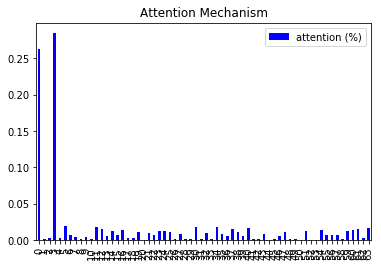

In [130]:
N = 0
ds = pd.DataFrame(k, columns=['attention (%)'])
ds.plot(kind='bar', title='Attention Mechanism')
plt.show()

In [131]:
#where this attention is concentrated to